In [1]:
import os
import numpy as np
import pandas as pd
import joblib

In [2]:
os.getcwd()

'C:\\Users\\Administrator\\Documents\\PythonAdvanced-main\\live'

In [3]:
os.chdir(path = '../data')

In [4]:
os.listdir()

['GDP_Per_Capital_2021.csv',
 'KBO_Hitter_2021.z',
 'Used_Cars_Price.csv',
 'Used_Cars_Price.xlsx',
 'Used_Cars_Price.z',
 'Used_Cars_Price_Prep.z']

In [5]:
df = pd.read_excel('Used_Cars_Price.xlsx')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1268 non-null   int64 
 1   Age        1268 non-null   int64 
 2   KM         1268 non-null   int64 
 3   FuelType   1268 non-null   object
 4   HP         1268 non-null   int64 
 5   MetColor   1268 non-null   int64 
 6   Automatic  1268 non-null   int64 
 7   CC         1268 non-null   int64 
 8   Doors      1268 non-null   int64 
 9   Weight     1268 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 99.2+ KB


In [7]:
df = joblib.load('Used_Cars_Price.z')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1268 non-null   int64 
 1   Age        1268 non-null   int64 
 2   KM         1268 non-null   int64 
 3   FuelType   1268 non-null   object
 4   HP         1268 non-null   int64 
 5   MetColor   1268 non-null   object
 6   Automatic  1268 non-null   object
 7   CC         1268 non-null   int64 
 8   Doors      1268 non-null   int64 
 9   Weight     1268 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 99.2+ KB


In [9]:
%precision 3
pd.options.display.precision = 3

In [10]:
from scipy import stats
from statsmodels import robust

In [11]:
df['Price'].mean()

9696.851

In [13]:
nums = pd.Series(data = [1, np.nan, 2])
nums

0    1.0
1    NaN
2    2.0
dtype: float64

In [14]:
nums.mean()

1.500

In [15]:
stats.trim_mean(df['Price'], 0.1)

9591.892

In [16]:
df['Price'].median()

9487.500

In [17]:
stats.trim_mean(df['Price'], 0.5)

C:\Users\Administrator\Venv\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Administrator\Venv\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [18]:
df['Price'].quantile(np.linspace(0, 1, 100+1))

0.00     4350.00
0.01     5830.15
0.02     5950.00
0.03     6495.05
0.04     6650.00
          ...   
0.96    13580.00
0.97    13950.00
0.98    14229.30
0.99    14950.00
1.00    15950.00
Name: Price, Length: 101, dtype: float64

In [19]:
df['Price'].quantile(np.linspace(0, 1, 10+1))

0.0     4350.0
0.1     7250.0
0.2     7950.0
0.3     8500.0
0.4     8950.0
0.5     9487.5
0.6     9950.0
0.7    10500.0
0.8    11468.0
0.9    12500.0
1.0    15950.0
Name: Price, dtype: float64

In [20]:
df['Price'].quantile(np.linspace(0, 1, 4+1))

0.00     4350.0
0.25     8250.0
0.50     9487.5
0.75    10950.0
1.00    15950.0
Name: Price, dtype: float64

In [21]:
np.linspace(80, 75, 30+1)

array([80.   , 79.833, 79.667, 79.5  , 79.333, 79.167, 79.   , 78.833,
       78.667, 78.5  , 78.333, 78.167, 78.   , 77.833, 77.667, 77.5  ,
       77.333, 77.167, 77.   , 76.833, 76.667, 76.5  , 76.333, 76.167,
       76.   , 75.833, 75.667, 75.5  , 75.333, 75.167, 75.   ])

In [22]:
df['Price'].max()

15950

In [23]:
df['Price'].min()

4350

In [24]:
df['Price'].max() - df['Price'].min()

11600

In [25]:
df['Price'].quantile([0, 1])

0.0     4350.0
1.0    15950.0
Name: Price, dtype: float64

In [27]:
df['Price'].quantile([0, 1]).diff().iloc[-1]

11600.000

In [28]:
df['Price'].quantile([0, 1]).diff().iloc[[-1]]

1.0    11600.0
Name: Price, dtype: float64

In [29]:
df['Price'].quantile([0.25, 0.75]).diff().iloc[-1]

2700.000

In [30]:
df['FuelType'].mode()

0    Petrol
Name: FuelType, dtype: object

In [31]:
df['FuelType'].value_counts()

Petrol    1125
Diesel     126
CNG         17
Name: FuelType, dtype: int64

In [32]:
df['FuelType'].value_counts().sort_index()

CNG         17
Diesel     126
Petrol    1125
Name: FuelType, dtype: int64

In [33]:
df['FuelType'].value_counts(normalize = True).sort_index()

CNG       0.013
Diesel    0.099
Petrol    0.887
Name: FuelType, dtype: float64

In [34]:
df['Price'].var()

4117236.370

In [35]:
df['Price'].std()

2029.097

In [ ]:
x = df['Price']

In [ ]:
xsum = x.sum()
xcnt = x.count()

In [37]:
xavg = xsum / xcnt

In [44]:
xvar = sum((x - xavg) ** 2) / xcnt

In [45]:
xvar ** (1/2)

2028.297

In [46]:
robust.mad(df['Price'])

2168.306

In [48]:
df.mean(numeric_only = True)

Price      9696.851
Age          60.593
KM        73737.629
HP          100.442
CC         1558.816
Doors         4.002
Weight     1061.572
dtype: float64

In [49]:
df.apply(func = 'mean', numeric_only = True)

Price      9696.851
Age          60.593
KM        73737.629
HP          100.442
CC         1558.816
Doors         4.002
Weight     1061.572
dtype: float64

In [54]:
df.apply(func = 'std', numeric_only = True)

Price      2029.097
Age          13.709
KM        35858.332
HP           13.100
CC          183.657
Doors         0.949
Weight       33.839
dtype: float64

In [55]:
df.apply(func = 'median', numeric_only = True)

Price      9487.5
Age          63.0
KM        67358.5
HP          110.0
CC         1600.0
Doors         4.0
Weight     1060.0
dtype: float64

In [56]:
df.describe()

,Price,Age,KM,HP,CC,Doors,Weight
count,1268.000,1268.000,1268.000,1268.000,1268.000,1268.000,1268.000
mean,9696.851,60.593,73737.629,100.442,1558.816,4.002,1061.572
std,2029.097,13.709,35858.332,13.100,183.657,0.949,33.839
min,4350.000,19.000,5309.000,69.000,1300.000,3.000,1000.000
25%,8250.000,51.000,48950.250,86.000,1400.000,3.000,1035.000
50%,9487.500,63.000,67358.500,110.000,1600.000,4.000,1060.000
75%,10950.000,72.000,90315.000,110.000,1600.000,5.000,1075.000
max,15950.000,80.000,243000.000,116.000,2000.000,5.000,1205.000


In [57]:
df.describe(include = object)

,FuelType,MetColor,Automatic
count,1268,1268,1268
unique,3,2,2
top,Petrol,1,0
freq,1125,840,1198


In [58]:
type(df.describe(include = object))

pandas.core.frame.DataFrame

In [59]:
from GraphicSetting import *
import HelloDataScience as hds

In [62]:
lotto = np.random.choice(a = np.arange(1, 46), size = 6, replace = False)
lotto.sort()
lotto

array([ 8, 28, 33, 34, 37, 44])

In [66]:
for i in range(10):
    # np.random.seed(seed = 1234)
    lotto = np.random.choice(a = np.arange(1, 46), size = 6, replace = False)
    lotto.sort()
    print(lotto)

[ 1 10 12 29 31 34]
[ 6 19 23 32 33 38]
[11 15 22 31 32 33]
[ 7  8 29 30 32 43]
[ 7  8 13 30 33 43]
[ 4  6 10 30 34 41]
[ 3  9 11 23 35 38]
[16 17 21 26 30 43]
[ 1  4  5  8 35 37]
[24 32 37 43 44 45]


In [76]:
np.random.seed(1234)

In [77]:
heights = stats.norm.rvs(loc = 175, scale = 5, size = 5000)

In [78]:
heights.mean()

175.121

In [79]:
heights.std()

4.959

In [83]:
stats.norm.pdf(x = 175, loc = 175, scale = 15) * 1000000

26596.152

In [84]:
stats.norm.pdf(x = 175, loc = 175, scale = 10) * 1000000

39894.228

In [85]:
stats.norm.pdf(x = 175, loc = 175, scale = 5) * 1000000

79788.456

In [86]:
stats.norm.pdf(x = [174, 175, 176], loc = 175, scale = 5)

array([0.078, 0.08 , 0.078])

In [87]:
stats.norm.pdf(x = [174, 175, 176], loc = 175, scale = 5).prod()

0.000

In [88]:
np.log(stats.norm.pdf(x = [174, 175, 176], loc = 175, scale = 5)).sum()

-7.625

In [89]:
np.log(stats.norm.pdf(x = [174, 175, 176], loc = 173, scale = 5)).sum()

-7.865

In [90]:
np.log(stats.norm.pdf(x = [174, 175, 176], loc = 177, scale = 5)).sum()

-7.865

In [91]:
stats.norm.cdf(x = 185, loc = 175, scale = 15)

0.748

In [92]:
stats.norm.cdf(x = 185, loc = 175, scale = 10)

0.841

In [93]:
stats.norm.cdf(x = 185, loc = 175, scale = 5)

0.977

In [94]:
1 - stats.norm.cdf(x = 185, loc = 175, scale = 5)

0.023

In [96]:
cdfs = stats.norm.cdf(x = [165, 185], loc = 175, scale = 5)
cdfs

array([0.023, 0.977])

In [98]:
np.diff(cdfs)[0]

0.954

In [101]:
pd.Series(data = cdfs).diff().iloc[-1]

0.954

In [103]:
# 평균이 3, 표준편차가 1인 정규분포에서 1~5일 확률
np.diff(stats.norm.cdf(x = [1, 5], loc = 3, scale = 1))[0]

0.954

In [104]:
stats.norm.ppf(q = 0.748, loc = 175, scale = 15)

185.023

In [105]:
stats.norm.ppf(q = 0.841, loc = 175, scale = 10)

184.986

In [106]:
stats.norm.ppf(q = 0.977, loc = 175, scale = 5)

184.977

In [107]:
stats.norm.ppf(q = 0.95, loc = 175, scale = 5)

183.224

In [108]:
stats.norm.ppf(q = 0.99, loc = 175, scale = 5)

186.632

In [109]:
stats.skew(heights)

-0.037

In [110]:
stats.kurtosis(heights)

-0.071

In [111]:
stats.shapiro(heights)

ShapiroResult(statistic=0.9995919466018677, pvalue=0.396047443151474)

In [112]:
np.random.seed(1234)

In [113]:
heights = stats.norm.rvs(loc = 175, scale = 5, size = 10000)

In [114]:
heights.mean()

175.081

In [115]:
heights.std()

4.976

In [116]:
stats.shapiro(heights)

C:\Users\Administrator\Venv\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9996193051338196, pvalue=0.04346244037151337)

In [117]:
stats.anderson(heights)

AndersonResult(statistic=0.35265258232357155, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [118]:
def scale(x, loc, scale):
    return (x - loc) / scale

In [120]:
scale(x = 185, loc = 175, scale = 15)

0.667

In [121]:
scale(x = 185, loc = 175, scale = 10)

1.000

In [122]:
scale(x = 185, loc = 175, scale = 5)

2.000

In [127]:
locs = np.where(np.abs(stats.zscore(heights)) > 3)
locs

(array([  81, 1307, 1333, 1670, 2053, 2289, 3136, 3924, 4097, 4477, 4599,
        5274, 5903, 5935, 7040, 7340, 7510, 7743, 8578, 8650, 9406, 9888],
       dtype=int64),)

In [128]:
heights[locs]

array([157.182, 190.628, 190.548, 155.596, 158.613, 191.103, 158.832,
       157.826, 160.072, 159.918, 159.246, 158.679, 157.003, 160.031,
       158.681, 160.142, 159.258, 191.439, 158.343, 155.707, 190.188,
       159.739])

In [129]:
med = np.median(heights)
med

175.090

In [130]:
mad = robust.mad(heights)
mad

4.932

In [131]:
locs = np.where(np.abs((heights - med) / mad) > 3)
locs

(array([  81, 1307, 1333, 1670, 2053, 2289, 2404, 3136, 3780, 3924, 4097,
        4477, 4599, 4712, 5274, 5903, 5935, 7040, 7340, 7510, 7743, 8578,
        8650, 9406, 9678, 9888], dtype=int64),)

In [132]:
heights[locs]

array([157.182, 190.628, 190.548, 155.596, 158.613, 191.103, 160.277,
       158.832, 160.279, 157.826, 160.072, 159.918, 159.246, 190.006,
       158.679, 157.003, 160.031, 158.681, 160.142, 159.258, 191.439,
       158.343, 155.707, 190.188, 160.236, 159.739])

In [133]:
import pingouin as pg
import scikit_posthocs as sp

In [134]:
os.listdir()

['GDP_Per_Capital_2021.csv',
 'KBO_Hitter_2021.z',
 'Used_Cars_Price.csv',
 'Used_Cars_Price.xlsx',
 'Used_Cars_Price.z',
 'Used_Cars_Price_Prep.z']

In [135]:
df = joblib.load('Used_Cars_Price.z')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1268 non-null   int64 
 1   Age        1268 non-null   int64 
 2   KM         1268 non-null   int64 
 3   FuelType   1268 non-null   object
 4   HP         1268 non-null   int64 
 5   MetColor   1268 non-null   object
 6   Automatic  1268 non-null   object
 7   CC         1268 non-null   int64 
 8   Doors      1268 non-null   int64 
 9   Weight     1268 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 99.2+ KB


In [137]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [138]:
df['Age'].cov(df['Price'])

-22157.693

In [140]:
df.cov().round(2)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2140\3994763845.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov().round(2)


,Price,Age,KM,HP,CC,Doors,Weight
Price,4.117e+06,-22157.69,-3.744e+07,5899.69,1.881e+04,317.01,15155.22
Age,-2.216e+04,187.94,1.712e+05,-7.99,-2.136e+02,-1.18,-98.23
KM,-3.744e+07,171187.12,1.286e+09,-155996.12,2.558e+06,595.87,359258.46
HP,5.900e+03,-7.99,-1.560e+05,171.61,-4.669e+01,1.50,-39.09
CC,1.881e+04,-213.61,2.558e+06,-46.69,3.373e+04,23.85,5001.29
Doors,3.170e+02,-1.18,5.959e+02,1.50,2.385e+01,0.90,13.21
Weight,1.516e+04,-98.23,3.593e+05,-39.09,5.001e+03,13.21,1145.08


In [141]:
df['Age'].corr(df['Price'])

-0.797

In [142]:
df.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2140\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Age,KM,HP,CC,Doors,Weight
Price,1.000,-0.797,-0.515,0.222,0.050,0.165,0.221
Age,-0.797,1.000,0.348,-0.044,-0.085,-0.091,-0.212
KM,-0.515,0.348,1.000,-0.332,0.388,0.018,0.296
HP,0.222,-0.044,-0.332,1.000,-0.019,0.120,-0.088
CC,0.050,-0.085,0.388,-0.019,1.000,0.137,0.805
Doors,0.165,-0.091,0.018,0.120,0.137,1.000,0.412
Weight,0.221,-0.212,0.296,-0.088,0.805,0.412,1.000


In [144]:
files = os.listdir()

In [145]:
[file for file in files if os.path.isfile(file)]

['GDP_Per_Capital_2021.csv',
 'KBO_Hitter_2021.z',
 'Used_Cars_Price.csv',
 'Used_Cars_Price.xlsx',
 'Used_Cars_Price.z',
 'Used_Cars_Price_Prep.z']

In [146]:
[file for file in files if os.path.isdir(file)]

['temp']

In [147]:
[file for file in files if 'xlsx' in file]

['Used_Cars_Price.xlsx']

In [148]:
pg.corr(x = df['Age'], y = df['Price'])

,n,r,CI95%,p-val,BF10,power
pearson,1268,-0.797,"[-0.82, -0.78]",5.880e-279,6.169e+274,1.0


In [149]:
x = df['Age']

In [151]:
pg.corr(x = x, y = df['Price'])['p-val']

pearson    5.880e-279
Name: p-val, dtype: float64

In [154]:
locs = df.dtypes == 'int64'

In [155]:
df.loc[:, locs]

,Price,Age,KM,HP,CC,Doors,Weight
0,13500,23,46986,90,2000,3,1165
1,13750,23,72937,90,2000,3,1165
2,13950,24,41711,90,2000,3,1165
3,14950,26,48000,90,2000,3,1165
4,13750,30,38500,90,2000,3,1170
...,...,...,...,...,...,...,...
1263,15950,25,25000,97,1400,3,1100
1264,15500,25,49163,110,1600,5,1165
1265,15950,25,29719,97,1400,5,1110
1266,15950,19,51884,97,1400,3,1100


In [158]:
pval = df.loc[:, locs].apply(func = lambda x: pg.corr(x = x, y = df['Price'])['p-val'])
pval.ge(0.05)

,Price,Age,KM,HP,CC,Doors,Weight
pearson,False,False,False,False,True,False,False


In [157]:
df.loc[:, locs].apply(func = lambda x: pg.corr(x = x, y = df['Price'])['r'])

,Price,Age,KM,HP,CC,Doors,Weight
pearson,1.0,-0.797,-0.515,0.222,0.05,0.165,0.221


In [160]:
pg.normality(data = df, dv = 'Price', group = 'MetColor', method = 'shapiro')

,W,pval,normal
1,0.975,7.077e-11,False
0,0.988,1.430e-03,False


In [162]:
avgs = df.groupby(by = ['MetColor'])['Price'].mean().reset_index()
avgs

,MetColor,Price
0,0,9466.673
1,1,9814.132


In [163]:
df1 = pd.merge(left = df, right = avgs, how = 'inner', on = 'MetColor')
df1.head()

,Price_x,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price_y
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,9814.132
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,9814.132
2,13950,24,41711,Diesel,90,1,0,2000,3,1165,9814.132
3,12950,29,9750,Petrol,97,1,0,1400,3,1100,9814.132
4,14950,26,32692,Petrol,97,1,0,1400,3,1100,9814.132


In [166]:
df1['Error'] = df1['Price_x'] - df1['Price_y']
df1.head()

,Price_x,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price_y,Error
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,9814.132,3685.868
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,9814.132,3935.868
2,13950,24,41711,Diesel,90,1,0,2000,3,1165,9814.132,4135.868
3,12950,29,9750,Petrol,97,1,0,1400,3,1100,9814.132,3135.868
4,14950,26,32692,Petrol,97,1,0,1400,3,1100,9814.132,5135.868


In [167]:
stats.shapiro(df1['Error'])

ShapiroResult(statistic=0.9835606813430786, pvalue=8.399511641776769e-11)

In [168]:
pg.homoscedasticity(data = df, dv = 'Price', group = 'MetColor', method = 'levene')

,W,pval,equal_var
levene,5.761,0.017,False


In [169]:
values = df['MetColor'].unique()
values

array(['1', '0'], dtype=object)

In [170]:
[v for v in values]

['1', '0']

In [172]:
sp1, sp2 = [df['Price'][df['MetColor'].eq(v)] for v in values]

In [173]:
sp1 = df['Price'][df['MetColor'].eq('1')]
sp2 = df['Price'][df['MetColor'].eq('0')]

In [174]:
pg.ttest(x = sp1, y = sp2, correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.892,1266,two-sided,0.004,"[111.73, 583.18]",0.172,4.077,0.824


In [175]:
pg.ttest(x = sp1, y = sp2, correction = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.984,935.893,two-sided,0.003,"[118.92, 576.0]",0.172,5.313,0.824


In [176]:
pg.mwu(x = sp1, y = sp2)

,U-val,alternative,p-val,RBC,CLES
MWU,193144.0,two-sided,0.03,-0.074,0.537


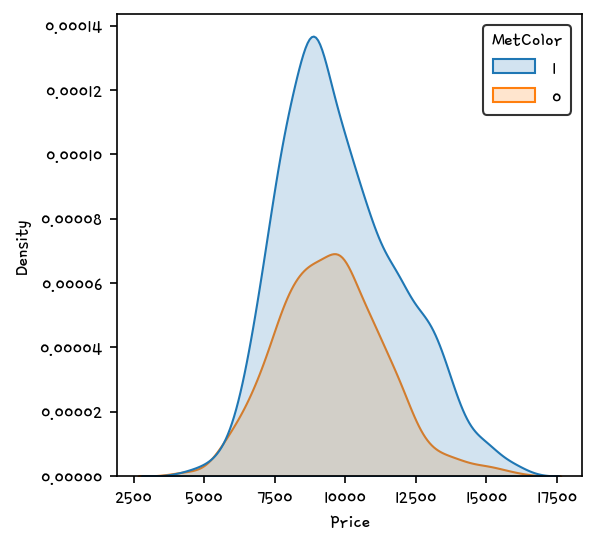

In [179]:
sns.kdeplot(data = df, x = 'Price', hue = 'MetColor', fill = True, alpha = 0.2);

In [180]:
pg.normality(data = df, dv = 'Price', group = 'FuelType')

,W,pval,normal
Diesel,0.956,4.250e-04,False
Petrol,0.978,5.504e-12,False
CNG,0.952,4.957e-01,True


In [181]:
pg.homoscedasticity(data = df, dv = 'Price', group = 'FuelType')

,W,pval,equal_var
levene,6.498,0.002,False


In [182]:
pg.anova(data = df, dv = 'Price', between = 'FuelType')

C:\Users\Administrator\Venv\lib\site-packages\pingouin\parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


,Source,ddof1,ddof2,F,p-unc,np2
0,FuelType,2,1265,3.983,0.019,0.006


In [183]:
pg.welch_anova(data = df, dv = 'Price', between = 'FuelType')

C:\Users\Administrator\Venv\lib\site-packages\pingouin\parametric.py:1341: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_res = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


,Source,ddof1,ddof2,F,p-unc,np2
0,FuelType,2,38.942,2.612,0.086,0.006


In [184]:
pg.kruskal(data = df, dv = 'Price', between = 'FuelType')

,Source,ddof1,H,p-unc
Kruskal,FuelType,2,10.475,0.005


In [186]:
sp.posthoc_scheffe(a = df, val_col = 'Price', group_col = 'FuelType')

,Diesel,Petrol,CNG
Diesel,1.000,0.022,0.934
Petrol,0.022,1.000,0.798
CNG,0.934,0.798,1.000


In [187]:
sp.posthoc_tukey(a = df, val_col = 'Price', group_col = 'FuelType')

,Diesel,Petrol,CNG
Diesel,1.000,0.016,0.900
Petrol,0.016,1.000,0.759
CNG,0.900,0.759,1.000


In [188]:
pg.normality(data = df, dv = 'Price', group = 'Automatic')

,W,pval,normal
0,0.981,2.977e-11,False
1,0.948,5.998e-03,False


In [189]:
values = df['Automatic'].unique()
sp1, sp2 = [df['Price'][df['Automatic'].eq(v)] for v in values]

In [190]:
pg.mwu(x = sp1, y = sp2)

,U-val,alternative,p-val,RBC,CLES
MWU,37216.5,two-sided,0.113,0.112,0.444


In [191]:
pg.homoscedasticity(data = df, dv = 'Price', group = 'Automatic')

,W,pval,equal_var
levene,1.093,0.296,True


In [192]:
pg.ttest(x = sp1, y = sp2, correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.473,1266,two-sided,0.141,"[-856.55, 121.99]",0.181,0.377,0.313


In [195]:
pd.crosstab(index = df['MetColor'], 
            columns = df['Automatic'], 
            margins = True, 
            margins_name = '합계')

Automatic,0,1,합계
MetColor,,,
0,402,26,428
1,796,44,840
합계,1198,70,1268


In [196]:
pd.crosstab(index = df['MetColor'], 
            columns = df['Automatic'], 
            margins = True, 
            margins_name = '합계', 
            normalize = 'index')

Automatic,0,1
MetColor,,
0,0.939,0.061
1,0.948,0.052
합계,0.945,0.055


In [198]:
test = pg.chi2_independence(data = df, x = 'MetColor', y = 'Automatic', correction = False)

In [200]:
test[2].iloc[0]

test      pearson
lambda        1.0
chi2        0.381
dof           1.0
pval        0.537
cramer      0.017
power       0.095
Name: 0, dtype: object

In [201]:
df = df.drop(columns = ['CC', 'Automatic'])
df = df[df['FuelType'].ne('CNG')]

In [202]:
df = df.reset_index(drop = True)

In [203]:
joblib.dump(value = df, filename = 'Used_Cars_Price_Prep.z')

['Used_Cars_Price_Prep.z']